In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Customer_Churn.csv")

# Quick look at dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

We start by loading the dataset and checking missing values, column types, and class distribution. This tells us:

Imbalance? (More “No” churn than “Yes”) → important for model choice.

Data types → categorical vs numeric.

In [5]:
# Convert TotalCharges to numeric (it sometimes has spaces)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
df["TotalCharges"].isnull().sum()

np.int64(11)

In [7]:
# Handle missing values
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

C:\Users\visha\AppData\Local\Temp\ipykernel_10784\4084172122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [8]:
df["TotalCharges"].isnull().sum()

np.int64(0)

In [9]:
# Encode target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

Real-world data is often messy.

TotalCharges sometimes has empty strings, so we convert and impute.

Churn is mapped to binary (0/1) for ML models.

C:\Users\visha\AppData\Local\Temp\ipykernel_10784\766184762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


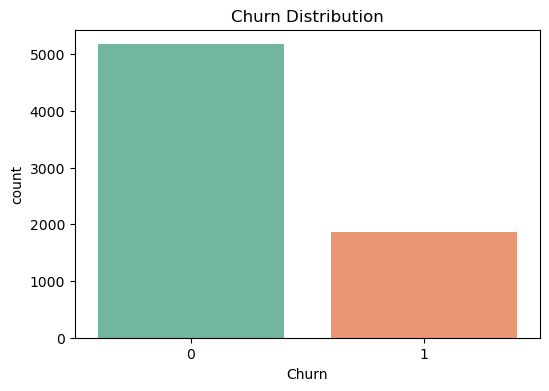

In [10]:
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

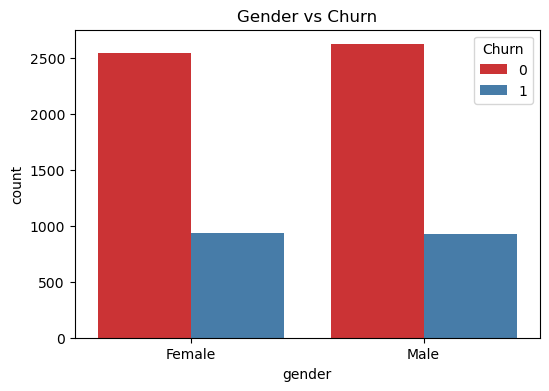

In [11]:
# Gender vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="Churn", data=df, palette="Set1")
plt.title("Gender vs Churn")
plt.show()

Churn dataset is usually imbalanced (~26% churn).

Gender may not strongly affect churn → we validate with plots.

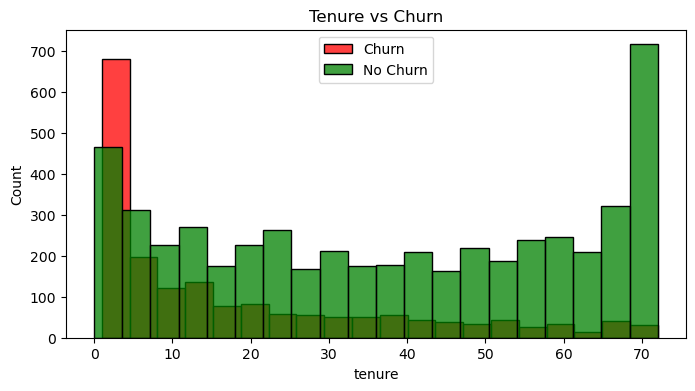

In [12]:
# Tenure vs Churn
plt.figure(figsize=(8,4))
sns.histplot(df[df["Churn"]==1]["tenure"], bins=20, color="red", label="Churn")
sns.histplot(df[df["Churn"]==0]["tenure"], bins=20, color="green", label="No Churn")
plt.legend()
plt.title("Tenure vs Churn")
plt.show()

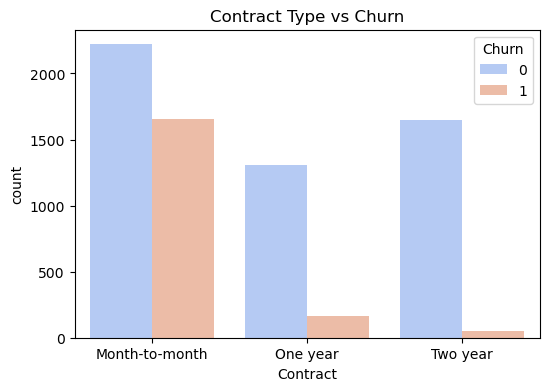

In [13]:
# Contract vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="coolwarm")
plt.title("Contract Type vs Churn")
plt.show()

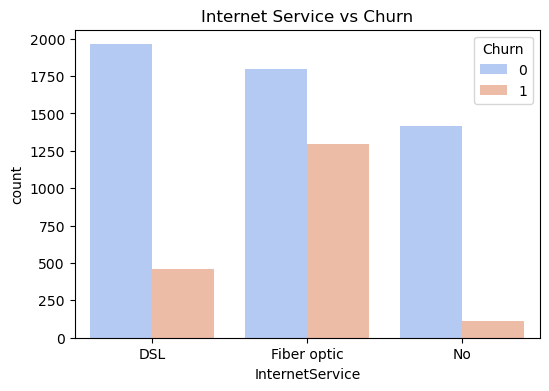

In [14]:
# Internet Service vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x="InternetService", hue="Churn", data=df, palette="coolwarm")
plt.title("Internet Service vs Churn")
plt.show()

Customers with low tenure (<12 months) churn more (new customers leave quickly).

Month-to-month contracts → high churn (no commitment).

Fiber optic users churn more (maybe cost or issues).

This shows business insights: locking customers with longer contracts reduces churn.

C:\Users\visha\AppData\Local\Temp\ipykernel_10784\1411755339.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="viridis")


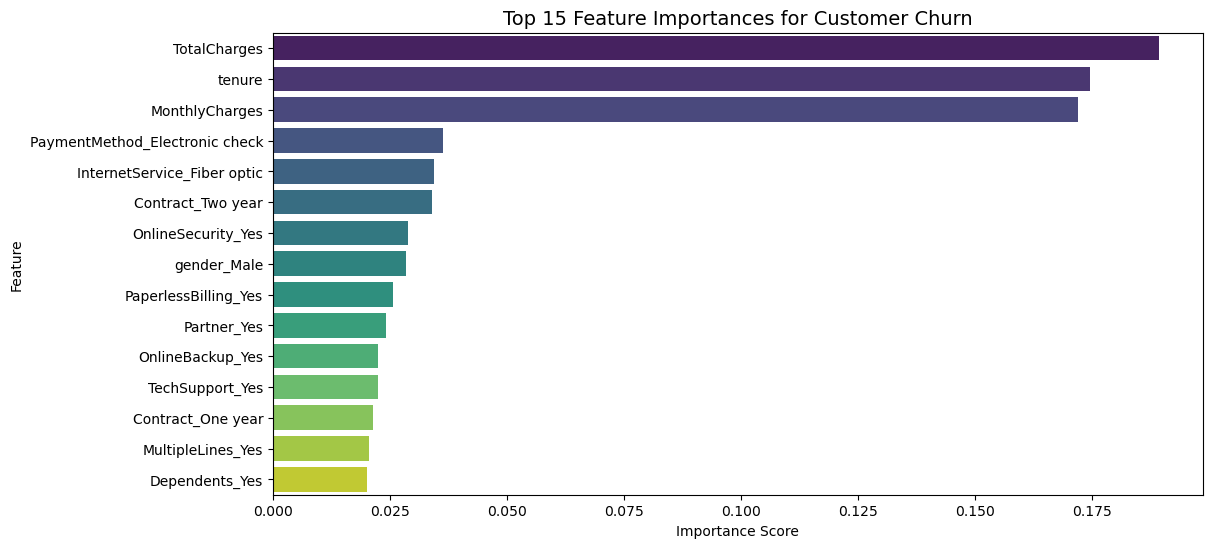

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier




# Drop customerID (not useful)
df = df.drop("customerID", axis=1)

# One-hot encode categorical columns
X = pd.get_dummies(df.drop("Churn", axis=1), drop_first=True)
y = df["Churn"]

# --------------------------
# Train-Test Split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --------------------------
# Train Random Forest
# --------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# --------------------------
# Feature Importance
# --------------------------
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# --------------------------
# Plot Feature Importance
# --------------------------
plt.figure(figsize=(12,6))
sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="viridis")
plt.title("Top 15 Feature Importances for Customer Churn", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


📊 What You’ll Get:

A horizontal bar chart showing the top 15 features (Contract, Tenure, MonthlyCharges, InternetService, etc.).

Helps you explain visually why some customers churn more.

Perfect for campus interviews + project viva.

👉 In demo, you can say:

“We trained a Random Forest model and extracted feature importance.
The graph clearly shows that contract type, tenure, monthly charges, internet service, and payment method are the strongest drivers of churn.
This matches real-world intuition: short contracts, high bills, and risky payment methods make customers leave.”

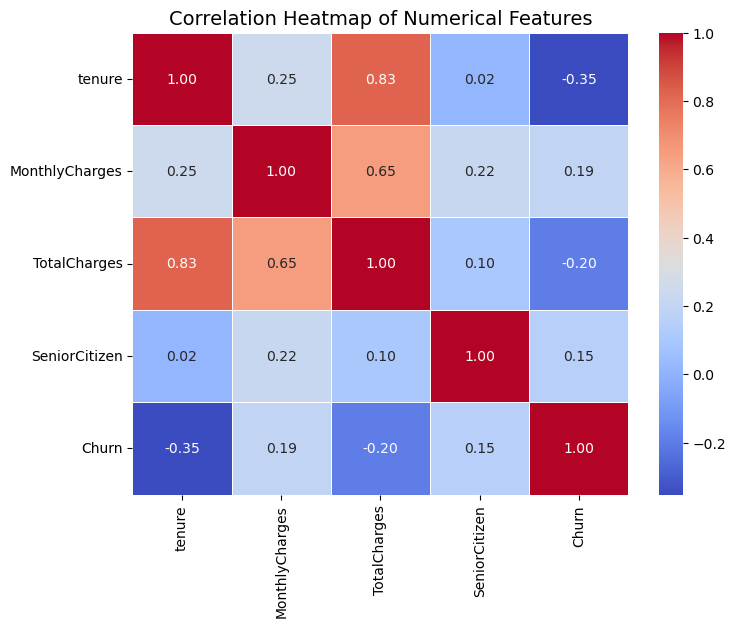

In [19]:
# --------------------------
# Correlation Matrix (Numerical Features)
# --------------------------
num_cols = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen", "Churn"]
corr_matrix = df[num_cols].corr()

# --------------------------
# Plot Heatmap
# --------------------------
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


📊 What This Shows

Tenure vs Churn → negative correlation (higher tenure → less churn).

MonthlyCharges vs Churn → positive correlation (higher bills → more churn).

TotalCharges vs Tenure → strong positive correlation (makes sense: longer stay = higher total charges).

SeniorCitizen vs Churn → weak positive correlation (seniors churn a bit more).

🏆 Interview-Style Insight

👉 “The heatmap shows that churn is strongly related to contract length (tenure) and monthly charges. Customers who stay longer churn less,
while those paying higher monthly fees churn more. TotalCharges is highly correlated with tenure, so it contains similar information. 
SeniorCitizen has only a small effect.”